<a href="https://colab.research.google.com/github/amutharun/GenAIWorkshop/blob/main/Reimagine_ML_Problems_with_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reimagine Traditional ML problems with Gen AI

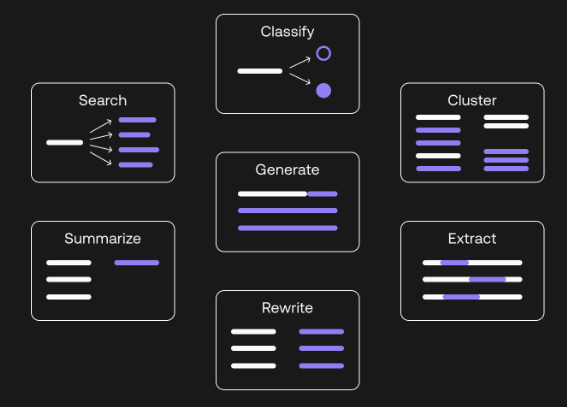

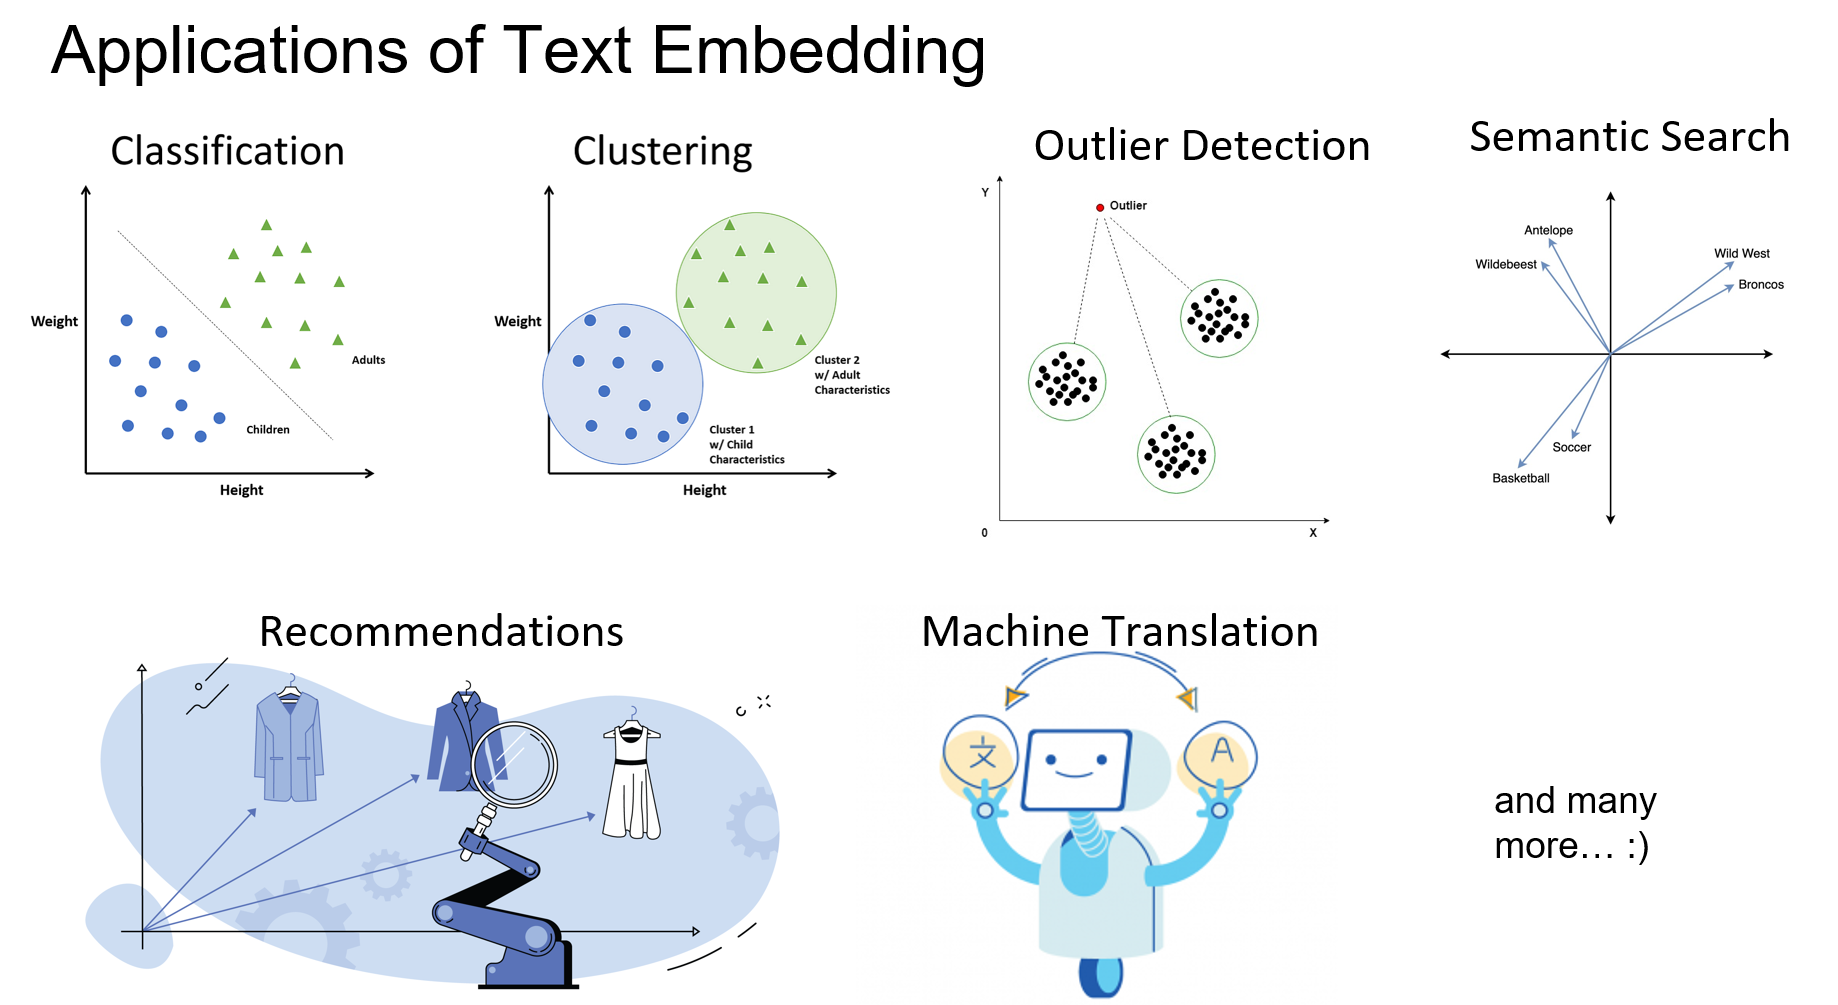

# **Clustering**

In [ ]:
 !pip install tiktoken openai umap-learn altair datasets mplcursors ipympl

In [2]:
import openai
import numpy as np
import pandas as pd
from openai.embeddings_utils import get_embedding

In [ ]:
# load env vars
!pip install --upgrade python-dotenv
from dotenv import load_dotenv
import openai
import os
load_dotenv()

# API configuration
openai.api_key = os.getenv("OPENAI_API_KEY")

# for LangChain
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

*In case, you do not like setting up .env file and want to expose your API key on the notebooks try skip the above cell and just run the below*

In [ ]:
# openai.api_key = "sk-xxx" # Workshop key.

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [5]:
# Load the pickle file that contains the 2000 wikipedia articles
wiki_articles = pd.read_pickle('/content/wikipedia.pkl')
wiki_articles


,id,title,text,url,wiki_id,views,paragraph_id,langs,emb
0,0,24-hour clock,The 24-hour clock is a way of telling the time...,https://simple.wikipedia.org/wiki?curid=9985,9985,2450.625488,0,30,"[0.07711287587881088, 0.3197174072265625, -0.2..."
1,14,The Dark Knight Trilogy,"The ""Dark Knight"" Series is a set of three Chr...",https://simple.wikipedia.org/wiki?curid=377304,377304,1897.982666,0,13,"[0.2566547989845276, -0.17023412883281708, 0.1..."
2,19,Abella Danger,"Abella Danger (born November 19, 1995) is an A...",https://simple.wikipedia.org/wiki?curid=797944,797944,1748.024170,0,30,"[-0.20083625614643097, -0.14190533757209778, -..."
3,24,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (born 5 Fe...,https://simple.wikipedia.org/wiki?curid=65655,65655,1564.210449,0,156,"[-0.4638298451900482, -0.0351627953350544, 0.7..."
4,61,Carles Puigdemont,Carles Puigdemont i Casamajó (born 29 December...,https://simple.wikipedia.org/wiki?curid=540154,540154,1542.519531,0,81,"[-0.12089978903532028, 0.06191902980208397, 0...."
...,...,...,...,...,...,...,...,...,...
1995,34633,1st century,"During this period Europe, North Africa and th...",https://simple.wikipedia.org/wiki?curid=24589,24589,122.295425,0,133,"[-0.33043625950813293, -0.234648197889328, -0...."
1996,34653,Operation Restore Hope,The Operation Restore Hope was an operation of...,https://simple.wikipedia.org/wiki?curid=427200,427200,122.192032,0,12,"[0.5195494294166565, -0.06794795393943787, 0.2..."
1997,34655,Rumi,Jalal ad-Din Muhammad Rumi (30 September 1207 ...,https://simple.wikipedia.org/wiki?curid=64995,64995,122.192032,0,101,"[-0.254226416349411, 0.6597043871879578, -0.00..."
1998,34669,Korean War,"The Korean War (Korean: 한국전잴, Russian: Корейск...",https://simple.wikipedia.org/wiki?curid=7537,7537,122.175140,0,120,"[0.22879508137702942, -0.1242295652627945, -0...."


Optional Step - Create Embeddings for each article using OpenAI ada model.
This step can be performed for a fresh run of code for a new data set.

Once the embeddings are created, it can be saved as a pickle file for future use.

The embedding creation for 2000 wiki articles takes 5 min

In [7]:
# Embedding creation takes few min. In ordet to avoid rerunning everytime we can save it as a file for future use.
wiki_articles["embedding"] = wiki_articles.text.apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))

In [8]:
wiki_articles.head()

,id,title,text,url,wiki_id,views,paragraph_id,langs,emb,embedding
0,0,24-hour clock,The 24-hour clock is a way of telling the time...,https://simple.wikipedia.org/wiki?curid=9985,9985,2450.625488,0,30,"[0.07711287587881088, 0.3197174072265625, -0.2...","[0.014963177032768726, 0.009803893975913525, 0..."
1,14,The Dark Knight Trilogy,"The ""Dark Knight"" Series is a set of three Chr...",https://simple.wikipedia.org/wiki?curid=377304,377304,1897.982666,0,13,"[0.2566547989845276, -0.17023412883281708, 0.1...","[-0.0006983188213780522, -0.04207836836576462,..."
2,19,Abella Danger,"Abella Danger (born November 19, 1995) is an A...",https://simple.wikipedia.org/wiki?curid=797944,797944,1748.024170,0,30,"[-0.20083625614643097, -0.14190533757209778, -...","[-0.03004520758986473, -0.03132428228855133, -..."
3,24,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (born 5 Fe...,https://simple.wikipedia.org/wiki?curid=65655,65655,1564.210449,0,156,"[-0.4638298451900482, -0.0351627953350544, 0.7...","[-0.022732604295015335, 0.005111063830554485, ..."
4,61,Carles Puigdemont,Carles Puigdemont i Casamajó (born 29 December...,https://simple.wikipedia.org/wiki?curid=540154,540154,1542.519531,0,81,"[-0.12089978903532028, 0.06191902980208397, 0....","[-0.011360807344317436, 0.0075058951042592525,..."


In [ ]:
# # Save the wiki articles along with the embeddings as a pickle file
# import pickle
# with open('/content/wiki_articles_with_emb.pickle', 'wb') as f:
#     pickle.dump(wiki_articles, f)

## Let's see how the articles look like in a 2D space

Thanks to the large dimension of the vector created by embedding, small variations in the data can be seen with greater precision.


### Supporting Functions

In [9]:
# Function to make a UMAP plot
import umap
import altair as alt

def umap_plot_big(text, emb):

    cols = list(text.columns)
    # UMAP reduces the dimensions from 1024 to 2 dimensions that we can plot
    reducer = umap.UMAP(n_neighbors=100)
    umap_embeds = reducer.fit_transform(emb)
    # Prepare the data to plot and interactive visualization
    # using Altair
    #df_explore = pd.DataFrame(data={'text': qa['text']})
    #print(df_explore)

    #df_explore = pd.DataFrame(data={'text': qa_df[0]})
    df_explore = text.copy()
    df_explore['x'] = umap_embeds[:,0]
    df_explore['y'] = umap_embeds[:,1]

    # Plot
    chart = alt.Chart(df_explore).mark_circle(size=60).encode(
        x=#'x',
        alt.X('x',
            scale=alt.Scale(zero=False)
        ),
        y=
        alt.Y('y',
            scale=alt.Scale(zero=False)
        ),
        tooltip=cols
        #tooltip=['text']
    ).properties(
        width=700,
        height=400
    )
    return chart


### Plot the high dimensional embeddings into 2D space using umap plot.


In [10]:
articles = wiki_articles[['title', 'text']]
embeds = np.array([d for d in wiki_articles['embedding']])

chart = umap_plot_big(articles, embeds)
chart.interactive()

alt.Chart(...)


## Traditional KMeans to LLM powered KMeans

* Transform our original dataset into embedding
* Create a Kmeans model using embeddings
* Evaluate it

Data prep up for Kmeans

In [11]:
wiki_list = wiki_articles['embedding'].to_list()

In [12]:
matrix = np.vstack(wiki_list)
matrix.shape

(2000, 1536)

In [13]:
df = wiki_articles

Cluster using KMeans

In [16]:
from sklearn.cluster import KMeans

n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

In [17]:
df.head()

,id,title,text,url,wiki_id,views,paragraph_id,langs,emb,embedding,Cluster
0,0,24-hour clock,The 24-hour clock is a way of telling the time...,https://simple.wikipedia.org/wiki?curid=9985,9985,2450.625488,0,30,"[0.07711287587881088, 0.3197174072265625, -0.2...","[0.014963177032768726, 0.009803893975913525, 0...",3
1,14,The Dark Knight Trilogy,"The ""Dark Knight"" Series is a set of three Chr...",https://simple.wikipedia.org/wiki?curid=377304,377304,1897.982666,0,13,"[0.2566547989845276, -0.17023412883281708, 0.1...","[-0.0006983188213780522, -0.04207836836576462,...",8
2,19,Abella Danger,"Abella Danger (born November 19, 1995) is an A...",https://simple.wikipedia.org/wiki?curid=797944,797944,1748.024170,0,30,"[-0.20083625614643097, -0.14190533757209778, -...","[-0.03004520758986473, -0.03132428228855133, -...",0
3,24,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (born 5 Fe...,https://simple.wikipedia.org/wiki?curid=65655,65655,1564.210449,0,156,"[-0.4638298451900482, -0.0351627953350544, 0.7...","[-0.022732604295015335, 0.005111063830554485, ...",0
4,61,Carles Puigdemont,Carles Puigdemont i Casamajó (born 29 December...,https://simple.wikipedia.org/wiki?curid=540154,540154,1542.519531,0,81,"[-0.12089978903532028, 0.06191902980208397, 0....","[-0.011360807344317436, 0.0075058951042592525,...",5


In [18]:
# Number of articles in each cluster
df.Cluster.value_counts()

3    323
8    285
0    284
7    253
4    180
6    155
2    152
5    139
1    127
9    102
Name: Cluster, dtype: int64

## **Cluster Visualization**

Let's visualize the clusters formed using an interactive t-SNE plot

In [19]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.palettes import Category10

output_notebook()

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

df_tsne = pd.DataFrame({
    'x': [x for x, y in vis_dims2],
    'y': [y for x, y in vis_dims2],
    'cluster': list(df.Cluster),
    'text': list(df.text)
})

unique_clusters = df_tsne.cluster.unique()
colors = Category10[len(unique_clusters)]

datasource = ColumnDataSource(df_tsne)

p = figure(title="Clusters identified visualized in language 2d using t-SNE",
           x_axis_label ='x', y_axis_label ='y',
           width = 800, height = 400)

p.add_tools(HoverTool(tooltips=[
    ("text", "@text")
]))

for i, cluster in enumerate(unique_clusters):
    data = df_tsne[df_tsne.cluster == cluster]
    p.scatter('x', 'y', source=ColumnDataSource(data), color=colors[i])

show(p)

### Cluster Analysis using LLMs.
Analyze if we have obtained meaningful clusters obtained using embeddings. Let's also try to automatically analyze the patterns in the clusters forms and meaningfully name the clusters

In [20]:

# Reading a review which belong to each group.
samples_per_cluster = 10

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    articles = "\n".join(
        df[df.Cluster == i].
        text.sample(samples_per_cluster, random_state=42)
        .values
    )
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f'What do the following articles have in common?\n\nArticles:\n"""\n{articles}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response["choices"][0]["text"].replace("\n", ""))

    sample_cluster_rows = df[df.Cluster == i].sample(samples_per_cluster, random_state=42)
    for j in range(samples_per_cluster):
        print(sample_cluster_rows.title.values[j], end=":   ")
        print(sample_cluster_rows.text.str[:70].values[j])

    print("-" * 100)


Cluster 0 Theme:  Famous People
Frank O'Connor:   Charles Francis O'Connor (September 22, 1897 – November 9 1979), calle
Woody Johnson:   Robert Wood "Woody" Johnson IV (born April 12, 1947) is an American bu
Shakira:   Shakira Isabel Mebarak Ripoll (born 2 February 1977 in Barranquilla, C
The Rolling Stones:   The Rolling Stones are an English rock band that formed in London in 1
Melania Trump:   Melanija Knavs Trump (born April 26, 1970) is a former Slovenian-Ameri
Radiohead:   Radiohead are an English rock band from Abingdon, Oxfordshire. The lea
Avicii:   Tim Bergling (; 8 September 1989 – 20 April 2018), known professionall
John Fetterman:   John Karl Fetterman (born August 15, 1969) is an American politician w
Kylie Jenner:   Kylie Kristen Jenner (born August 10, 1997) is an American reality tel
Chuckle Brothers:   The Chuckle Brothers were an English children's entertainment comedy d
------------------------------------------------------------------------------------------------

Remember how we used to solve the same problem in a traditional way ? :)



# **Semantic Search**

Semantic search refers to search algorithms that retrieve information by comprehending the meaning of the text, context, and intent behind a query, rather than simply matching keywords

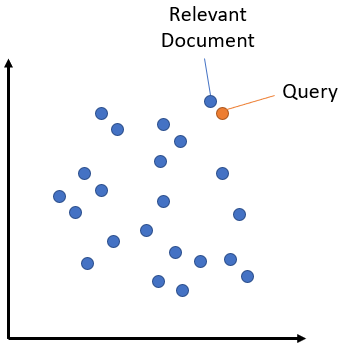

In [21]:
#wiki data
df.head()

,id,title,text,url,wiki_id,views,paragraph_id,langs,emb,embedding,Cluster
0,0,24-hour clock,The 24-hour clock is a way of telling the time...,https://simple.wikipedia.org/wiki?curid=9985,9985,2450.625488,0,30,"[0.07711287587881088, 0.3197174072265625, -0.2...","[0.014963177032768726, 0.009803893975913525, 0...",3
1,14,The Dark Knight Trilogy,"The ""Dark Knight"" Series is a set of three Chr...",https://simple.wikipedia.org/wiki?curid=377304,377304,1897.982666,0,13,"[0.2566547989845276, -0.17023412883281708, 0.1...","[-0.0006983188213780522, -0.04207836836576462,...",8
2,19,Abella Danger,"Abella Danger (born November 19, 1995) is an A...",https://simple.wikipedia.org/wiki?curid=797944,797944,1748.024170,0,30,"[-0.20083625614643097, -0.14190533757209778, -...","[-0.03004520758986473, -0.03132428228855133, -...",0
3,24,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (born 5 Fe...,https://simple.wikipedia.org/wiki?curid=65655,65655,1564.210449,0,156,"[-0.4638298451900482, -0.0351627953350544, 0.7...","[-0.022732604295015335, 0.005111063830554485, ...",0
4,61,Carles Puigdemont,Carles Puigdemont i Casamajó (born 29 December...,https://simple.wikipedia.org/wiki?curid=540154,540154,1542.519531,0,81,"[-0.12089978903532028, 0.06191902980208397, 0....","[-0.011360807344317436, 0.0075058951042592525,...",5


In [22]:
from openai.embeddings_utils import get_embedding, cosine_similarity

# search through the texts for a specific article
def search(df, description, n=3, pprint=True):
    description_embedding = get_embedding(
        description,
        engine="text-embedding-ada-002"
    )
    # compute cosine similarity between the embedded search query and all the documents
    df["similarity"] = df.embedding.apply(lambda x: cosine_similarity(x, description_embedding))

    # sort by similarity score and pick the top n
    results = (
        df.sort_values("similarity", ascending=False)
        .head(n).text
    )

    if pprint:
        for r in results:
            print(r[:200])
            print()
    return results

In [23]:
results = search(df, "Abdul Kalam", n=1)

Avul Pakir Jainulabdeen Abdul Kalam (; ; 15 October 1931 – 27 July 2015) usually known as A.P.J. Abdul Kalam, was a famous Indian aerospace engineer. He was the 11th President of India, from 2002 to 2



In [24]:
results = search(df, "India", n=3)

India (Hindi: ), officially the Republic of India (Hindi: ) and also known as Hindustan or Bhārat within the country, is a country in South Asia. It is the second largest country by number of people a

The Indian subcontinent is a term mainly used for the geographic region which includes: Bangladesh, Bhutan, Republic of India, Maldives, Nepal, Pakistan, Sri Lanka and, to the south, the Indian Ocean 

The Republic of India is divided into twenty-eight States and eight union territories, including the National Capital Territory.



In [25]:
results = search(df, "football", n=5)

American football, referred to as football in the United States and Canada and also known as gridiron, is a team sport. It is played by two teams with 11 players on each side. American football is pla

The FIFA World Cup is the most watched tournament in football (soccer). The Fédération Internationale de Football Association (FIFA) organises the World Cup every four years. More people watch the Wor

The (FIFA ; French for "International Federation of Association Football") is the organization that controls international football (also called "association football"). The organization’s main buildi

Argentina national football team is the national football team of Argentina. They are nicknamed La Albiceleste (the blue and whites).

In the 2018 FIFA World Cup, which is taking place in Russia from 14 June to 15 July 2018, the main disciplinary actions taken against players come in the form of red and yellow cards.



In [26]:
results = search(df, "socccer", n=5)

The FIFA World Cup is the most watched tournament in football (soccer). The Fédération Internationale de Football Association (FIFA) organises the World Cup every four years. More people watch the Wor

The (FIFA ; French for "International Federation of Association Football") is the organization that controls international football (also called "association football"). The organization’s main buildi

American football, referred to as football in the United States and Canada and also known as gridiron, is a team sport. It is played by two teams with 11 players on each side. American football is pla

In the 2018 FIFA World Cup, which is taking place in Russia from 14 June to 15 July 2018, the main disciplinary actions taken against players come in the form of red and yellow cards.

Spain national football team (Spanish: "Selección de fútbol de España)" is the national football team of Spain. The current head coach is Luis Enrique. The team is often called "La Roja "("The Red [On



In [27]:
results = search(df, "Successful People", n=5)

William Henry Gates III (born October 28, 1955) is an American businessman and the co-founder and chairman of Microsoft. He is the third-richest person in the world behind Jeff Bezos and Elon Musk in 

This decade (group of ten years) is sometimes called the "Greed decade" in English speaking countries. Unlike the 1960s and 1970s, this is when the word "yuppie" was used to describe "young urban prof

Steven Paul "Steve" Jobs (February 24, 1955 – October 5, 2011) was an American businessman, investor and co-founder and CEO of Apple Inc. He was the Chief Executive Officer (CEO) of Pixar Animation St

A statesman or stateswoman is a respected, skilled and experienced political leader or figure. In most respects a statesman is the opposite of a politician. Politicians are thought of as people who wi

From each according to his ability, to each according to his needs (or need) is a slogan that Karl Marx made popular in his writing "Critique of the Gotha program", published in 1875. The Germ

In [28]:
results = search(df, "tallest building", n=5)

Burj Khalifa (, ""Khalifa Tower"") is an extremely tall skyscraper in Dubai, United Arab Emirates named after Khalifa bin Zayed Al Nahyan, and is the tallest building ever built, at . Before the build

The Petronas Towers are two very tall skyscrapers in Kuala Lumpur, Malaysia. They were the tallest buildings in the world until 2004, but still remain the tallest twin buildings. Each tower has 88 flo

The Empire State Building is a skyscraper in Midtown Manhattan, New York City. It is tall and has 102 floors. Named after the popular nickname for New York, the Empire State, it is one of the most fam

One World Trade Center (also known as One WTC or Freedom Tower) is the main building of the new World Trade Center complex in Lower Manhattan, New York City. The building is tall making it the tallest

The CN Tower is a telecommunications tower in Toronto, Ontario, Canada. It is tall and is the tallest free-standing structure (meaning it cannot have wires to keep it standing) in Canada, Nort

Thant's a wrap. Now you go ahead and try with more interesting keywords...